In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
data=pd.read_csv('HR_comma_sep.csv')

In [3]:
model=LogisticRegression()
#dmatrices(which feature is Y, )
y, X = dmatrices('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+C(sales)+C(salary)', data, return_type='dataframe')
X = X.rename(columns = {
    'C(sales)[T.RandD]': 'Department: Random',
    'C(sales)[T.accounting]': 'Department: Accounting',
    'C(sales)[T.hr]': 'Department: HR',
    'C(sales)[T.management]': 'Department: Management',
    'C(sales)[T.marketing]': 'Department: Marketing',
    'C(sales)[T.product_mng]': 'Department: Product_Management',
    'C(sales)[T.sales]': 'Department: Sales',
    'C(sales)[T.support]': 'Department: Support',
    'C(sales)[T.technical]': 'Department: Technical',
    'C(salary)[T.low]': 'Salary: Low',
    'C(salary)[T.medium]': 'Salary: Medium'}) 

In [4]:
X.head()


,Intercept,Department: Random,Department: Accounting,Department: HR,Department: Management,Department: Marketing,Department: Product_Management,Department: Sales,Department: Support,Department: Technical,Salary: Low,Salary: Medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(X_train.shape)
print(y_train.shape)
y=np.ravel(y_train)
print(y.shape)
print(X.shape[1])


(11999, 19)
(11999, 1)
(11999,)
19


In [7]:
def normalize_x(X):
    
    for i in range(1, X.shape[1]):
        xmin=X[:,i].min()
        xmax=X[:,i].max()

        X[:,i]=(X[:,i]-xmin)/(xmax-xmin)
    return X

X_train=normalize_x(X_train.values)
X_test=normalize_x(X_test.values)

y_train=y_train.values
y_test=y_test.values


In [8]:

beta=np.random.randn(X_train.shape[1])
print(beta)

[-0.4747968   0.13824791 -0.19004257 -0.79540708 -0.01925384 -1.52203215
  0.05516748  1.38441462 -0.71871971  0.61043538  0.62993197  1.99326274
 -0.66936429 -0.99170151  0.50190888 -0.0182508  -0.91495521 -0.46226464
 -0.62507116]


In [9]:
def prob_function(X, y, beta):
    
    prob= 1/(1+np.exp(-np.matmul(X,beta)))
    error_count=0
    
    for i in range(len(y)):
        if (y[i]==0 and prob[i]>0.5) or (y[i]==1 and prob[i]<=0.5):
            error_count+=1
    error_rate=error_count/len(y)
    
    return prob,error_rate

0.4736228019001583


(array([9134.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2865.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

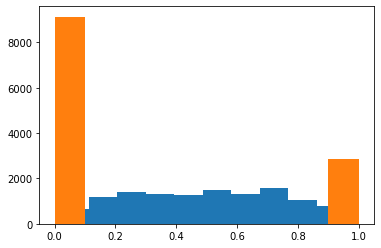

In [10]:

prob,error_rate=prob_function(X_train, y_train,beta)

print(error_rate)

plt.hist(prob)
plt.hist(y)


In [11]:
def loss_funct(y,prob):
    loss_function=0
    for i in range(len(y)):
        loss=(np.log(prob[i]))*y[i]+(1-y[i])*(np.log(1-prob[i]))
        loss_function+=loss
    loss_function=-loss_function/len(y)
    
    return loss_function

loss=loss_funct(y_train,prob)
print(loss)

[0.81493195]


In [12]:
X_train.shape[1]  

def loss_deriv(X,y, beta,prob):
    loss_deriv=np.zeros(X.shape[1])
    for i in range(len(y)):
        loss_deriv +=np.array(X[i,:].ravel()*(prob[i]-y[i]))
    deriv=loss_deriv/len(y)
    return deriv
deriv=loss_deriv(X_train,y_train,beta,prob)


In [13]:
beta=np.random.randn(X_train.shape[1])
alpha=1
error_rates=[]
beta_matrix=[]
for i in range(200):
    prob,error_rate=prob_function(X_train, y_train,beta)
    loss=loss_funct(y_train,prob)
    deriv=loss_deriv(X_train,y_train,beta,prob)
    beta_matrix.append(beta)
    if i%10==0:
        print('loss',loss,'error rate', error_rate)
    error_rates.append(error_rate)
    beta=-alpha*deriv+beta


loss [3.04803851] error rate 0.7612301025085424
loss [0.53511974] error rate 0.22685223768647386
loss [0.51805357] error rate 0.22001833486123842
loss [0.50467138] error rate 0.21185098758229853
loss [0.49398811] error rate 0.2097674806233853
loss [0.48533153] error rate 0.21076756396366364
loss [0.47822465] error rate 0.21185098758229853
loss [0.47232183] error rate 0.21276773064422036
loss [0.46736756] error rate 0.21301775147928995
loss [0.46316969] error rate 0.21393449454121177
loss [0.45958164] error rate 0.21551795982998584
loss [0.45649018] error rate 0.21635136261355112
loss [0.45380691] error rate 0.2171014251187599
loss [0.45146215] error rate 0.21785148762396866
loss [0.44940044] error rate 0.21835152929410784
loss [0.44757731] error rate 0.2196016334694558
loss [0.44595674] error rate 0.22051837653137762
loss [0.44450938] error rate 0.2210184182015168
loss [0.44321107] error rate 0.2213517793149429
loss [0.44204183] error rate 0.22226852237686473


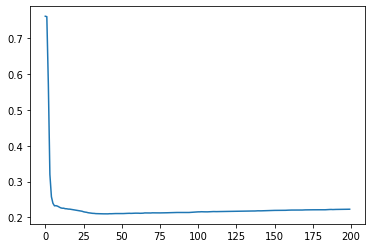

In [14]:
plt.plot(range(200),error_rates)



# choose the beta with lowest error rate

# validation with test data

In [15]:

error_rate_sort=np.argsort(error_rates)
print(error_rate_sort[0])

beta_optima=beta_matrix[error_rate_sort[0]]

40


In [16]:
y_valid_prob=1/(1+np.exp(-np.matmul(X_test,beta_optima)))
y_valid_prob.ravel()

y_valid_prob.shape[0]

3000

In [17]:
y_valid=[]
for i in range(y_valid_prob.shape[0]):
    if y_valid_prob[i]>=0.5:
        y_valid_id=1
    else:
        y_valid_id=0
    y_valid.append(y_valid_id)



In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y_valid,y_test))
print(classification_report(y_valid,y_test))
print(confusion_matrix(y_valid,y_test))

0.7853333333333333
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2738
           1       0.23      0.62      0.33       262

    accuracy                           0.79      3000
   macro avg       0.59      0.71      0.60      3000
weighted avg       0.89      0.79      0.83      3000

[[2194  544]
 [ 100  162]]


# overfitting exp


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [14999, 11999]

In [ ]:
np.random.seed(1)
alpha = 5 # learning rate
beta = np.random.randn(Xtrain.shape[1])
error_rates_train=[]
error_rates_vali=[]
for T in range(200):
    prob = np.array(1. / (1 + np.exp(-np.matmul(Xtrain, beta)))).ravel()  
    prob_y = list(zip(prob, ytrain))
    loss = -sum([np.log(p) if y == 1 else np.log(1 - p) for p, y in prob_y]) / len(ytrain) 
    error_rate = 0
    for i in range(len(ytrain)):
        if ((prob[i] > 0.5 and ytrain[i] == 0) or (prob[i] <= 0.5 and ytrain[i] == 1)):
            error_rate += 1;
    error_rate /= len(ytrain)
    error_rates_train.append(error_rate)
    
    prob_vali = np.array(1. / (1 + np.exp(-np.matmul(Xvali, beta)))).ravel()  # 根据当前beta预测离职的概率
    prob_y_vali = list(zip(prob_vali, yvali))
    loss_vali = -sum([np.log(p) if y == 1 else np.log(1 - p) for p, y in prob_y_vali]) / len(yvali) # 计算损失函数的值
    error_rate_vali = 0
    for i in range(len(yvali)):
        if ((prob_vali[i] > 0.5 and yvali[i] == 0) or (prob_vali[i] <= 0.5 and yvali[i] == 1)):
            error_rate_vali += 1
    error_rate_vali /= len(yvali)
    error_rates_vali.append(error_rate_vali)
    
    if T % 5 ==0 :
        print('T=' + str(T) + ' loss=' + str(loss) + ' error=' + str(error_rate)+ ' error_vali=' + str(error_rate_vali))
    # 计算损失函数关于beta每个分量的导数
    deriv = np.zeros(Xtrain.shape[1])
    for i in range(len(ytrain)):
        deriv += np.asarray(Xtrain[i,:]).ravel() * (prob[i] - ytrain[i])
    deriv /= len(ytrain)
    # 沿导数相反方向修改beta
    beta -= alpha * deriv

In [ ]:
plt.hist(prob)
plt.hist(y)

In [ ]:
plt.plot(range(50,200), error_rates_train[50:], 'r^', range(50, 200), error_rates_vali[50:], 'bs')
plt.show()

# gradient check

In [ ]:
np.random.seed(1)
alpha = 1  # learning rate
beta = np.random.randn(X.shape[1]) # 随机初始化参数beta

#dF/dbeta0
prob = np.array(1. / (1 + np.exp(-np.matmul(X, beta)))).ravel()  # 根据当前beta预测离职的概率
prob_y = list(zip(prob, y))
loss = -sum([np.log(p) if y == 1 else np.log(1. - p) for p, y in prob_y]) / len(y) # 计算损失函数的值
deriv = np.zeros(X.shape[1])
for i in range(len(y)):
    deriv += np.asarray(X[i,:]).ravel() * (prob[i] - y[i])
deriv /= len(y)
print('We calculated ' + str(deriv[0]))

delta = 0.0001
beta[0] += delta
prob = np.array(1. / (1 + np.exp(-np.matmul(X, beta)))).ravel()  # 根据当前beta预测离职的概率
prob_y = list(zip(prob, y))
loss2 = -sum([np.log(p) if y == 1 else np.log(1. - p) for p, y in prob_y]) / len(y) # 计算损失函数的值
shouldbe = (loss2 - loss) / delta # (F(b0+delta,b1,...,bn) - F(b0,...bn)) / delta
print('According to definition of gradient, it is ' + str(shouldbe))